In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import json

from matplotlib.colors import LogNorm

mkdir -p failed for path /.cache/matplotlib: [Errno 13] Permission denied: '/.cache'
Matplotlib created a temporary cache directory at /tmp/matplotlib-0e9et8j6 because there was an issue with the default path (/.cache/matplotlib); it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
window_indices = [1, 2]
h_factor = 0.1

final_index = 39

n_samples = 2**15

folder_names = [f"data_h={h_factor}hc/interval_{window_index}" for window_index in window_indices]

luca_times_list = []
luca_mx_list = []
luca_sigma_list = []
for folder_name in folder_names:
    with open(folder_name+'/data/optim.log', 'r') as file:
        luca_data = json.load(file)
    luca_times_list.append(np.array(luca_data['times']['value'][:final_index]))
    luca_mx_list.append(np.array(luca_data['e_ops']['mx']['Mean']['real'][:final_index]))
    luca_sigma_list.append(np.array(luca_data['e_ops']['mx']['Sigma'][:final_index]))

# ViT
file_name = f'data_h={h_factor}hc/optim_vit.log'
with open(file_name, 'r') as file:
    vit_data = json.load(file)
vit_times = np.array(vit_data['e_ops']['Mx']['Mean']['iters'][:final_index*2-1])
vit_mx = np.array(vit_data['e_ops']['Mx']['Mean']['value']['real'][:final_index*2-1])
vit_sigma = np.array(vit_data['e_ops']['Mx']['Sigma']['value'][:final_index*2-1])

# p-tVMC
file_name = f'data_h={h_factor}hc/bare_ptvmc/optim.log'
with open(file_name, 'r') as file:
    data = json.load(file)
bare_times = np.concatenate((luca_times_list[0][:-1], np.array(data['times']['value'])))[:final_index-1]
bare_mx = np.concatenate((luca_mx_list[0][:-1], np.array(data['e_ops']['mx']['Mean']['real'])))[:final_index-1]
bare_sigma = np.concatenate((luca_sigma_list[0][:-1], np.array(data['e_ops']['mx']['Sigma'])))[:final_index-1]

# bridge
n_samples = 2**14
folder_name = f"data_h={h_factor}hc/bare_ptvmc/bridge_3000_40_20_100"
data = np.loadtxt(folder_name+f'/observable_values_{2**10}', dtype=complex)
bare_bridge_data = np.real(data)[:,:final_index]
print(np.linalg.norm(np.imag(data), axis=1) / data.shape[1])

with open(folder_name+f'/info_dict', 'rb') as file:
    data = pickle.load(file)
print(data['rme_time'] / 60)

[0.         0.00045018 0.         0.00877015 0.        ]
14.652512796719869


In [3]:
# Load hc=2

h_factor = 2.

mm_times_2, mm_mx_2 = np.loadtxt(f"data_h={h_factor}hc/MM_data.dat").T

file_name = f"data_h={h_factor}hc/bridge_data/data/optim.log"
with open(file_name, 'r') as file:
    luca_data = json.load(file)
luca_times_2 = np.array(luca_data['times']['value'])
luca_mx_2 = np.array(luca_data['e_ops']['mx']['Mean']['real'])
luca_sigma_2 = np.array(luca_data['e_ops']['mx']['Sigma'])

n_samples = 2**15
run_name = f"data_h={h_factor}hc/bridge_data/bridge_10000_40_20_100"
file_name = f"{run_name}/observable_values_{n_samples}"
data = np.loadtxt(file_name, dtype=complex)
bridge_data_2 = np.real(data)
print(np.linalg.norm(np.imag(data), axis=1) / data.shape[1])

with open(run_name+f'/info_dict', 'rb') as file:
    data = pickle.load(file)
print(data['rme_time'] / 60)

[0.00000000e+00 1.42834939e-05 0.00000000e+00 5.56530629e-03
 0.00000000e+00]
56.206948244571684


In [4]:
size = 40

font_size   = size
tklab_size  = size
label_size  = size
title_font  = 10
legend_size = size - 7
marker_sz   = 10
width_plot  = 4
aspect_ratio = 0.54
heigth_plot  = width_plot*aspect_ratio

from matplotlib import rc, rcParams
import matplotlib.ticker

rc("font", family="serif", size=font_size)
rc("text", usetex=False)


rcParams["figure.figsize"] = (5,3.)
rcParams["figure.dpi"]     = 100
rcParams["figure.titlesize"] = title_font
rcParams["lines.linewidth"]     = 2
rcParams["axes.labelsize"]      = label_size
rcParams["xtick.minor.visible"] = True
rcParams["xtick.major.size"]    = 4
rcParams["xtick.minor.size"]    = 2
rcParams["xtick.major.width"]   = 0.7
rcParams["xtick.minor.width"]   = 0.55
rcParams["xtick.direction"]     = "in"
rcParams["ytick.minor.visible"] = True
rcParams["ytick.major.size"]    = 4
rcParams["ytick.minor.size"]    = 2
rcParams["ytick.major.width"]   = 0.7
rcParams["ytick.minor.width"]   = 0.55
rcParams["ytick.direction"]     = "in"
rcParams["xtick.labelsize"]     = tklab_size
rcParams["ytick.labelsize"]     = tklab_size
rcParams["legend.fontsize"]     = legend_size
rcParams["legend.handlelength"] = 1
rcParams["legend.columnspacing"] = 1
rcParams["axes.formatter.limits"] = -4, 4

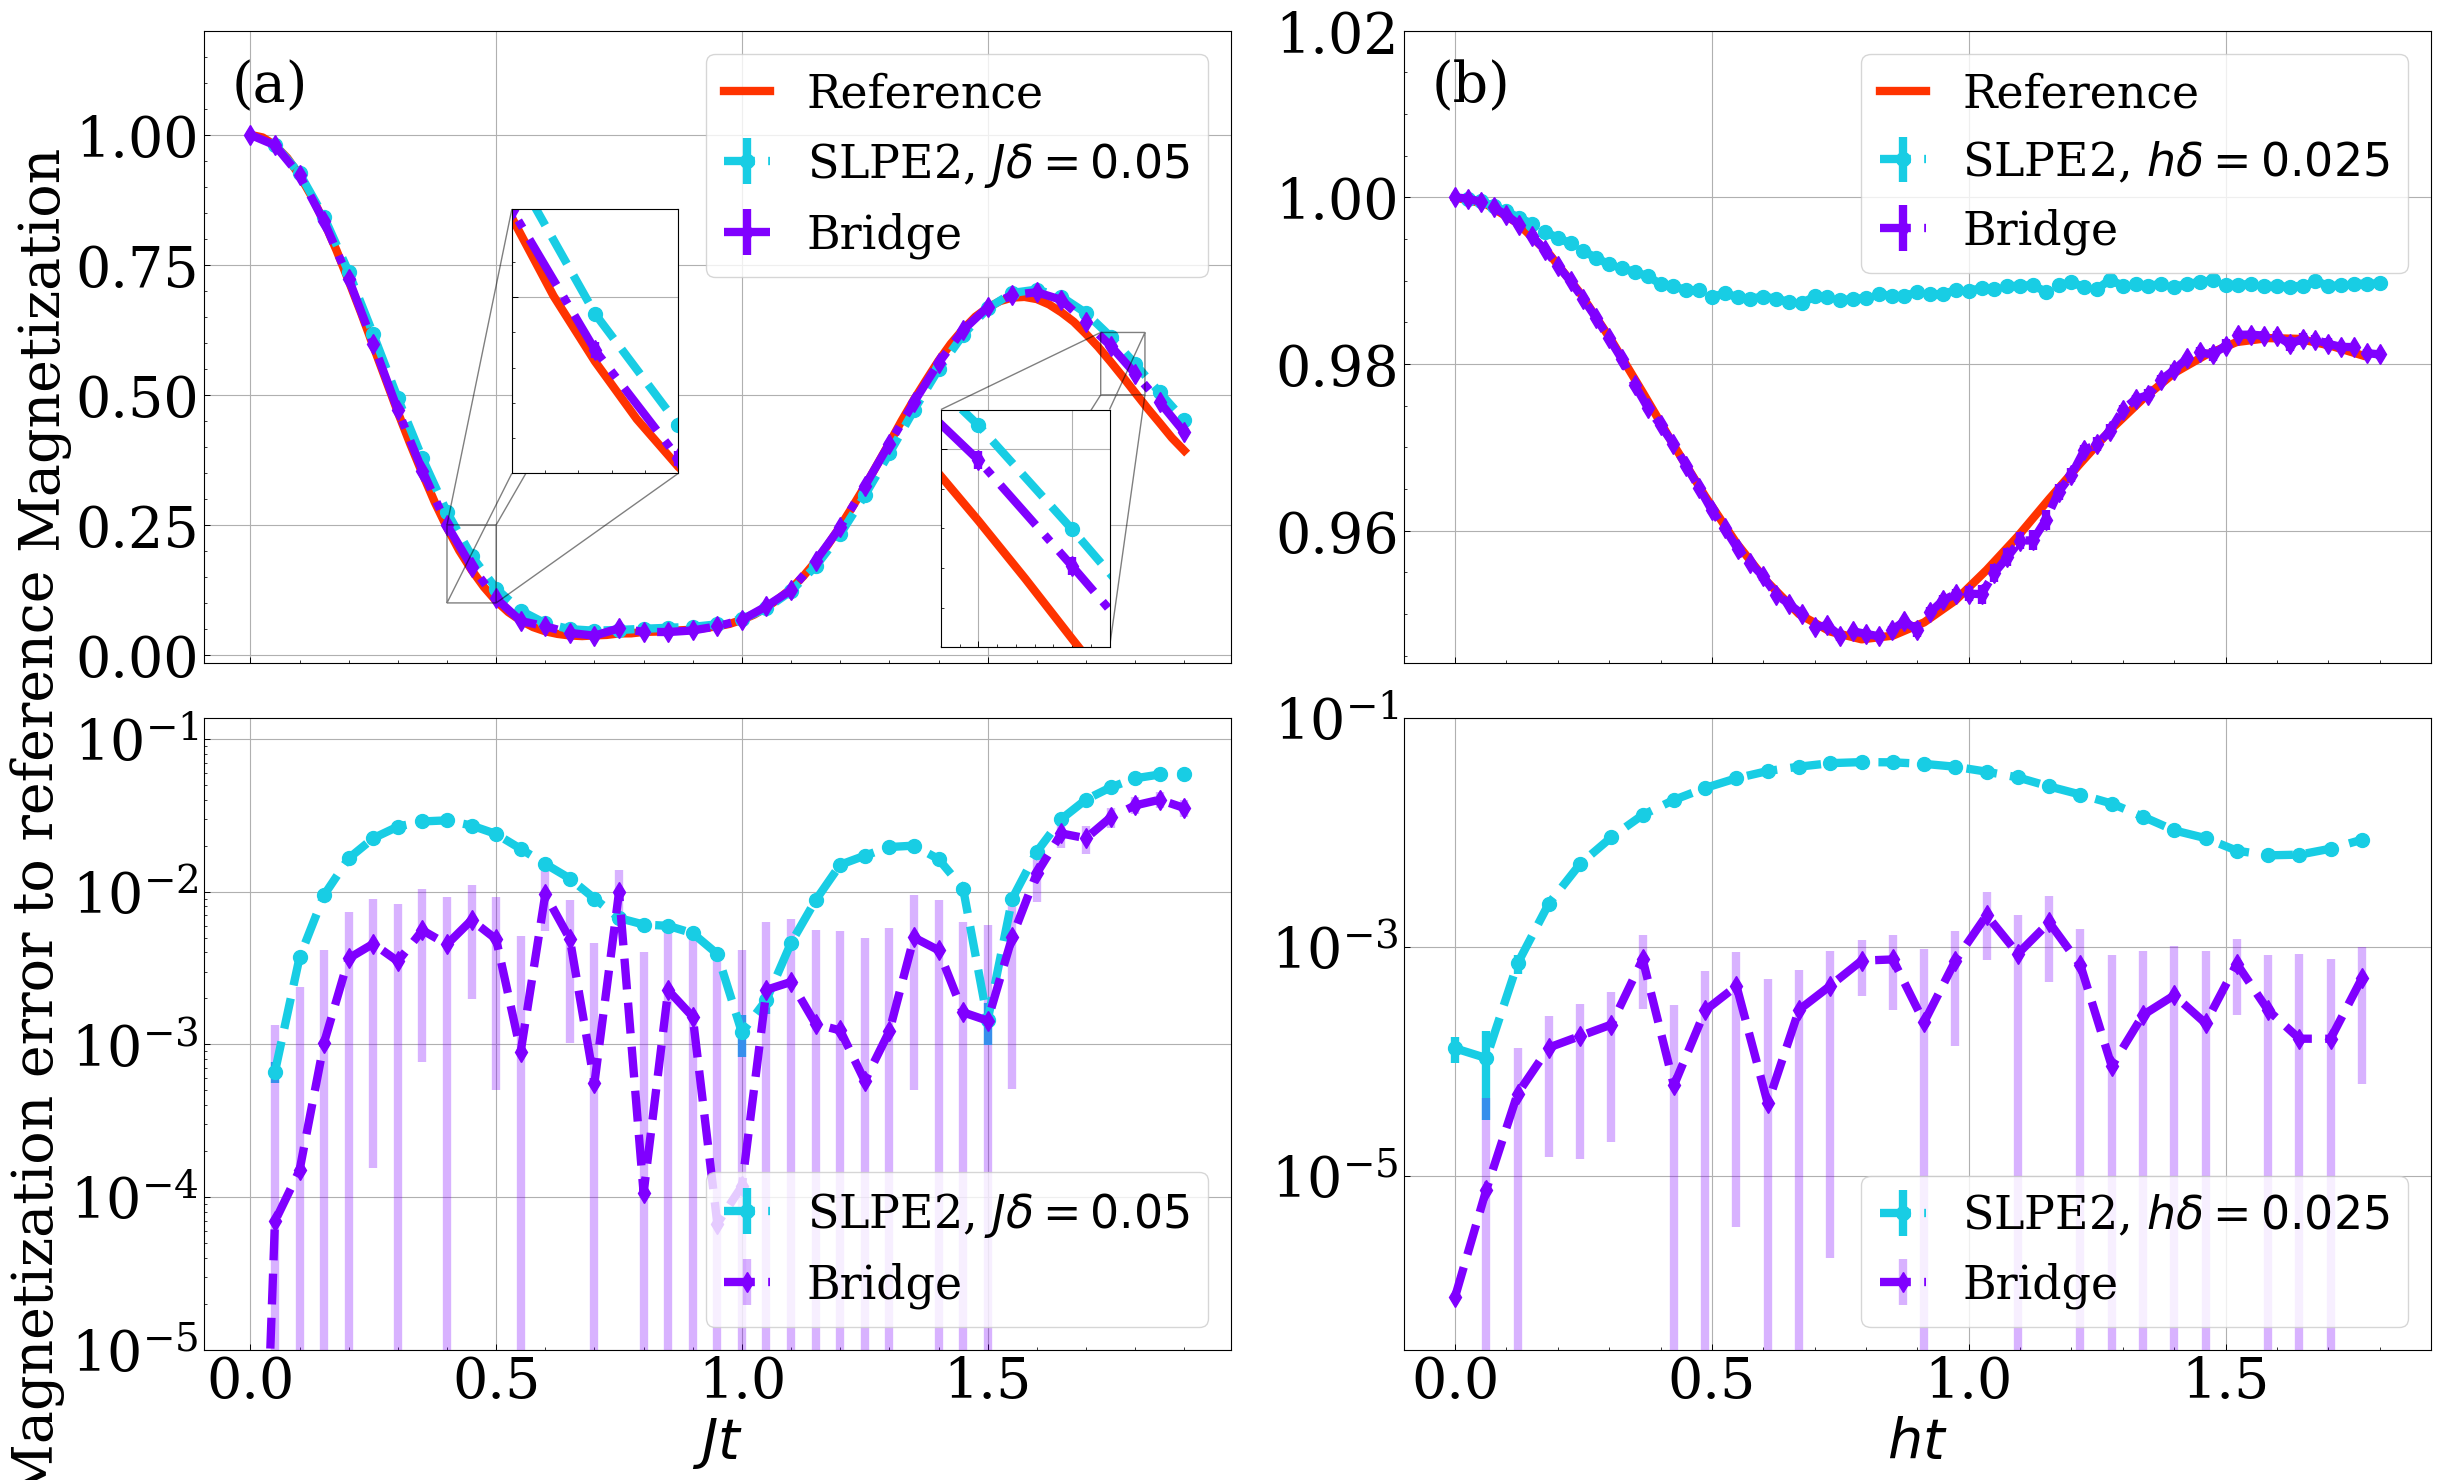

In [5]:
c_1 = cm.rainbow(0.1)
c_2 = cm.rainbow(0.3)
c_3 = cm.rainbow(0)
c_4 = cm.turbo(0.7)
c_5 = cm.turbo(0.8)

exact_color = cm.autumn(0.2)
ptvmc_color = c_2
bridge_color = c_3
final_bridge_color = c_5

alpha=0.3
bridge_color_dim = list(c_3)
bridge_color_dim[3] = alpha
final_bridge_color_dim = list(c_5)
final_bridge_color_dim[3] = alpha

ptvmc_m = 'o'
bridge_m = 'd'
final_bridge_m = None

ptvmc_m_2 = 'o'
bridge_m_2 = 'd'
final_bridge_m_2 = 'P'

ptvmc_ls = '--'
bridge_ls = '-.'

ms = 10
lw = 6

fig, ax = plt.subplots(2, 2, figsize=(24,14), sharex='col')
fig.tight_layout(pad=0)


ax[0,0].plot(vit_times, vit_mx, label='Reference', ls='-', c=exact_color, lw=lw)
ax[0,0].errorbar(bare_times, bare_mx, yerr=bare_sigma, label=r'SLPE2, $J\delta=0.05$', ls=ptvmc_ls, marker=ptvmc_m, ms=ms, c=ptvmc_color, lw=lw)
ax[0,0].errorbar(bare_bridge_data[0], bare_bridge_data[1], yerr=bare_bridge_data[2], label='Bridge', ls=bridge_ls, marker=bridge_m, ms=ms, c=bridge_color, lw=lw)

ax[0,0].legend(loc="upper right")
ax[0,0].set_ylabel("Magnetization")
ax[0,0].set_ylim(top=1.2)
ax[0,0].grid()



# Zoom in on part of the plot from ax
ax_x1, ax_x2 = ax[0,0].get_xlim()
ax_y1, ax_y2 = ax[0,0].get_ylim()

width = ax_x2 - ax_x1
height = ax_y2 - ax_y1

x1, x2 = 0.4, 0.5
y1, y2 = 0.1, 0.25

aspect = (x2 - x1) / (y2 - y1)

ax_inset = ax[0,0].inset_axes([0.3, 0.3, 0.2*height*aspect, 0.2*width])
ax_inset.plot(vit_times, vit_mx, ls='-', c=exact_color, lw=lw)
ax_inset.errorbar(bare_times, bare_mx, yerr=bare_sigma, label=r'SLPE2, $J\delta=0.05$', ls=ptvmc_ls, marker=ptvmc_m, ms=ms, c=ptvmc_color, lw=lw)
ax_inset.errorbar(bare_bridge_data[0], bare_bridge_data[1], yerr=bare_bridge_data[2], label='bridge', ls=bridge_ls, marker=bridge_m, ms=ms, c=bridge_color, lw=lw)


# Specify the zoom-in region
ax_inset.set_xlim(x1, x2)
ax_inset.set_ylim(y1, y2)
ax_inset.set_xticklabels('')
ax_inset.set_yticklabels('')
ax_inset.grid()

inset_indicator = ax[0,0].indicate_inset_zoom(ax_inset, edgecolor="black")
inset_indicator.connectors[0].set_visible(True)
inset_indicator.connectors[1].set_visible(True)
inset_indicator.connectors[2].set_visible(True)
inset_indicator.connectors[3].set_visible(True)


x1, x2 = 1.73, 1.82
y1, y2 = 0.5, 0.62
aspect = (x2 - x1) / (y2 - y1)

ax_inset_2 = ax[0,0].inset_axes([1.5/width, 0.03/height, 0.18*height*aspect, 0.18*width])
ax_inset_2.plot(vit_times, vit_mx, ls='-', c=exact_color, lw=lw)
ax_inset_2.errorbar(bare_times, bare_mx, yerr=bare_sigma, label=r'SLPE2, $J\delta=0.05J$', ls=ptvmc_ls, marker=ptvmc_m, ms=ms, c=ptvmc_color, lw=lw)
ax_inset_2.errorbar(bare_bridge_data[0], bare_bridge_data[1], yerr=bare_bridge_data[2], label='Bridge', ls=bridge_ls, marker=bridge_m, ms=ms, c=bridge_color, lw=lw)

ax_inset_2.set_xlim(x1, x2)
ax_inset_2.set_ylim(y1, y2)
ax_inset_2.set_xticklabels('')
ax_inset_2.set_yticklabels('')
ax_inset_2.grid()

inset_indicator_2 = ax[0,0].indicate_inset_zoom(ax_inset_2, edgecolor="black")
inset_indicator_2.connectors[0].set_visible(True)
inset_indicator_2.connectors[1].set_visible(True)
inset_indicator_2.connectors[2].set_visible(True)
inset_indicator_2.connectors[3].set_visible(True)




vit_indices, bare_indices = np.where(np.abs(vit_times[:,np.newaxis] - bare_times[np.newaxis,:]) < 1e-12)
ax[1,0].errorbar(vit_times[vit_indices], np.abs(bare_mx[bare_indices] - vit_mx[vit_indices]), yerr=bare_sigma[bare_indices], label=r'SLPE2, $J\delta=0.05$', ls='--', marker=ptvmc_m_2, ms=ms, c=ptvmc_color, lw=lw)

vit_indices, bare_bridge_indices = np.where(np.abs(vit_times[:,np.newaxis] - bare_bridge_data[0][np.newaxis,:]) < 1e-12)
ax[1,0].errorbar(vit_times[vit_indices], np.abs(bare_bridge_data[1][bare_bridge_indices] - vit_mx[vit_indices]), yerr=bare_bridge_data[2][bare_bridge_indices], label='Bridge', ls='--', marker=bridge_m_2, ms=ms, c=bridge_color, ecolor=bridge_color_dim, lw=lw)

ax[1,0].set_yscale('log')

ax[1,0].set_xlabel(r"$Jt$")
ax[1,0].set_ylabel("Magnetization error to reference")
ax[1,0].set_ylim(bottom=1e-5)

ax[1,0].legend()

ax[1,0].grid()





# hc=2

times_factor = h_factor * 3.044

mm_times_truncated_2 = mm_times_2[mm_times_2 < bridge_data_2[0][-1]]
mm_mx_truncated_2 = mm_mx_2[mm_times_2 < bridge_data_2[0][-1]]

ax[0,1].plot(mm_times_truncated_2*times_factor, mm_mx_truncated_2, label='Reference', c=exact_color, ls='-', lw=lw)
ax[0,1].errorbar(luca_times_2*times_factor, luca_mx_2, yerr=luca_sigma_2, label=r"SLPE2, $h\delta=0.025$", ls='--', marker=ptvmc_m, ms=ms, c=ptvmc_color, lw=lw)
ax[0,1].errorbar(bridge_data_2[0]*times_factor, bridge_data_2[1], yerr=bridge_data_2[2], label='Bridge', ls='--', marker=bridge_m, ms=ms, c=bridge_color, lw=lw)

ax[0,1].legend(loc="upper right")
ax[0,1].grid()
ax[0,1].set_xlim(left=-0.1, right=1.9)
ax[0,1].set_ylim(top=1.02)






luca_mx_interp_2 = np.interp(mm_times_truncated_2, luca_times_2, luca_mx_2)
luca_sigma_interp_2 = np.interp(mm_times_truncated_2, luca_times_2, luca_sigma_2)
ax[1,1].errorbar(mm_times_truncated_2*times_factor, np.abs(luca_mx_interp_2 - mm_mx_truncated_2), yerr=luca_sigma_interp_2, label=r"SLPE2, $h\delta=0.025$", ls='--', marker=ptvmc_m_2, ms=ms, c=ptvmc_color, lw=lw)

bridge_mx_interp_2 = np.interp(mm_times_truncated_2, bridge_data_2[0], bridge_data_2[1])
bridge_sigma_interp_2 = np.interp(mm_times_truncated_2, bridge_data_2[0], bridge_data_2[2])
ax[1,1].errorbar(mm_times_truncated_2*times_factor, np.abs(bridge_mx_interp_2 - mm_mx_truncated_2), yerr=bridge_sigma_interp_2, label='Bridge', ls='--', marker=bridge_m_2, ms=ms, c=bridge_color, ecolor=bridge_color_dim, lw=lw)

ax[1,1].legend()
ax[1,1].set_yscale('log')
ax[1,1].set_ylim(3e-7, 1e-1)

ax[1,1].grid()
ax[1,1].set_xlabel(r"$ht$")



for a, label in zip(ax[0], ['(a)', '(b)']):
    a.annotate(label, xy=(0, 1), xycoords='axes fraction', xytext=(+0.5, -0.5), textcoords='offset fontsize', fontsize=label_size, verticalalignment='top')

#plt.savefig('plot_01.pdf', bbox_inches='tight')